# **Customer Conversion Prediction**

# Problem Statement
You are working for a new-age insurance company and employ
multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective ways to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.

# Features:
● age (numeric)
● job : type of job
● marital : marital status
● educational_qual : education status
● call_type : contact communication type
● day: last contact day of the month (numeric)
● mon: last contact month of year
● dur: last contact duration, in seconds (numeric)
● num_calls: number of contacts performed during this
campaign and for this client
● prev_outcome: outcome of the previous marketing
campaign (categorical:
"unknown","other","failure","success")

**Output variable (desired target):**

● y - has the client subscribed to the insurance?

**Minimum Requirements**

It is not sufficient to just fit a model - the model must be
analysed to find the important factors that contribute towards
the price. AUROC must be used as a metric to evaluate the
performance of the models


#**Installation**

In [ ]:
#!pip install category_encoders

**1.Import Libraries**

In [ ]:
#Data preprocessing and read csv files, dataframes, etc
import pandas as pd
import numpy as np

#Encoding the data 
import category_encoders as ce

#Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

#Find the outliers in data
from scipy import stats

#Machine learning models and techniques
from sklearn.utils import resample,all_estimators
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

#To ignore warnings
import warnings
warnings.simplefilter('ignore')

**2.Import Dataset**

In [ ]:
df=pd.read_csv('/data/Customer Conversion Prediction - Customer Conversion Prediction.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**3.Data Preprocessing**

**Data Cleaning**


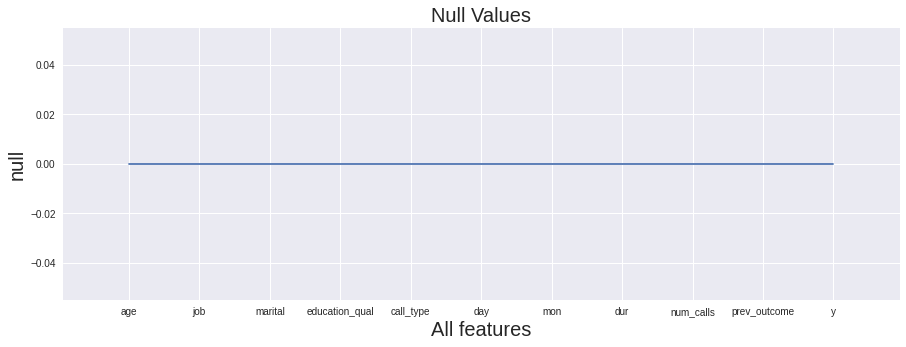

In [ ]:
#Find Null vallues
is_null=df.isnull().sum()

#plot the null values
plt.figure(figsize=(15,5))
plt.title('Null Values', fontsize=20)
plt.xlabel('All features', fontsize=20)
plt.ylabel('null', fontsize=20)
plt.plot(is_null.values)
plt.bar(is_null.index,is_null.values)
plt.show()

There is no null values

**Count the feature values which has stings**

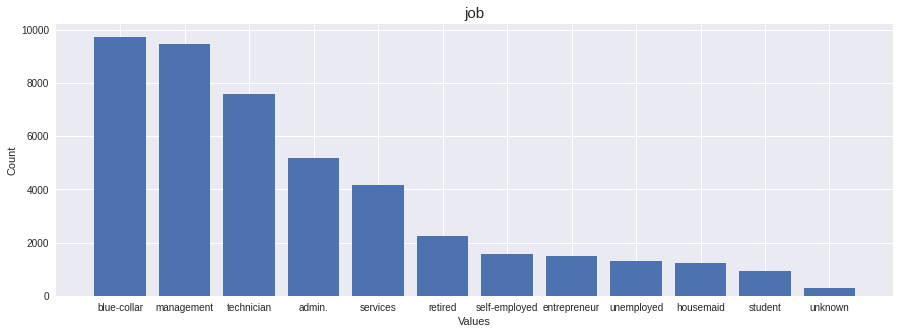

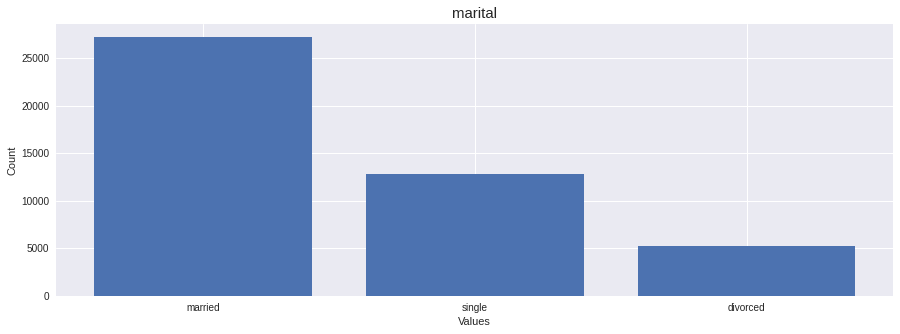

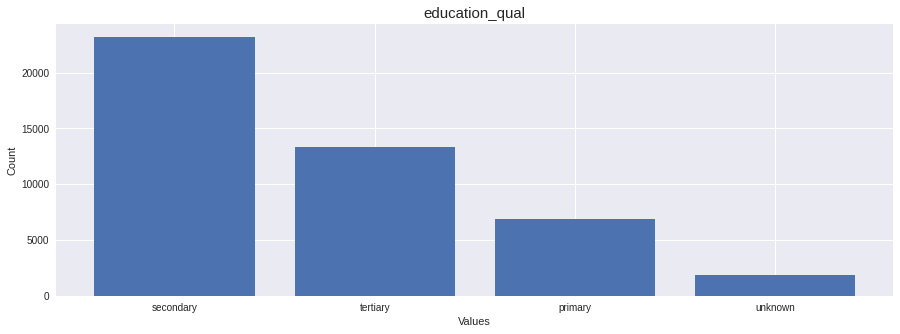

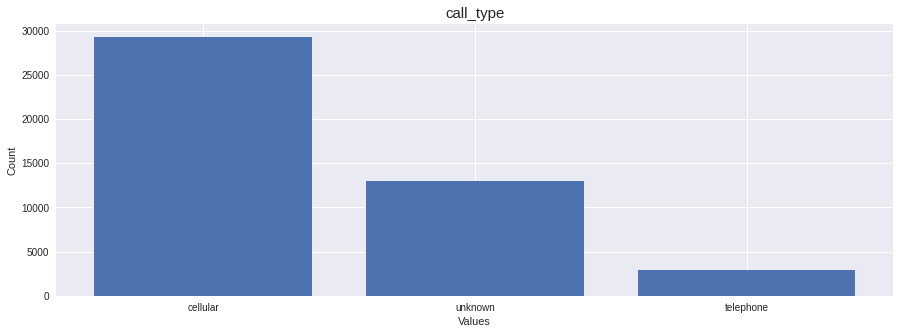

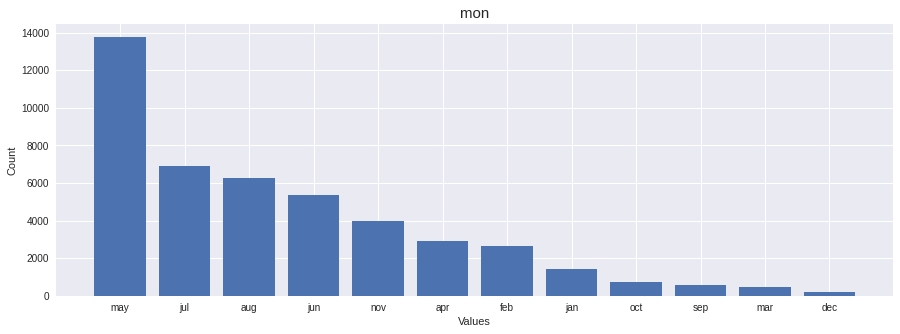

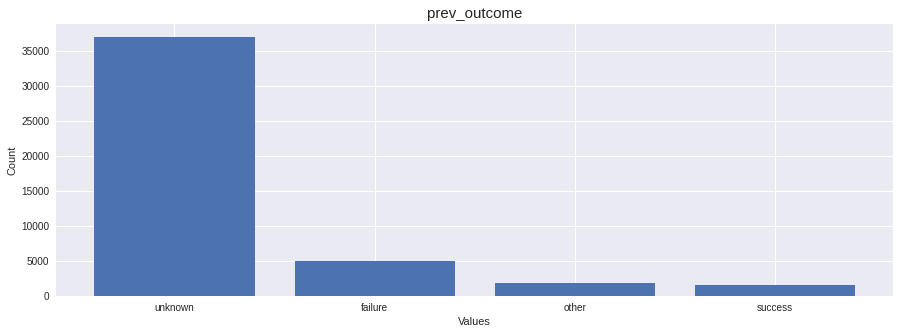

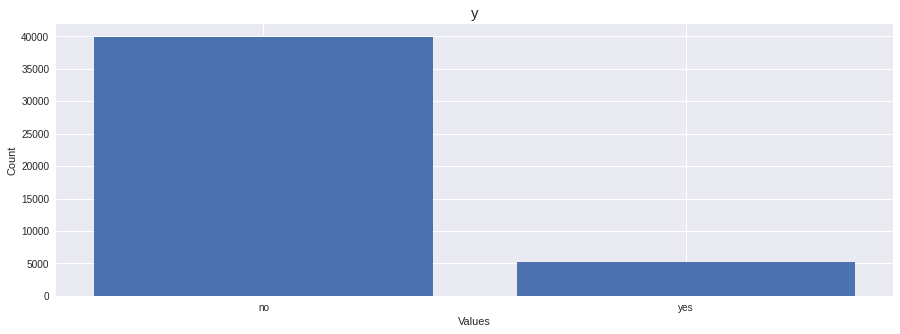

In [ ]:
for elem in df.columns:
  if elem not in ['age','day','dur','num_calls']:
    val_count=df[elem].value_counts()
    plt.figure(figsize=(15,5))
    plt.bar(val_count.index,val_count.values)
    plt.title(f'{elem}',fontsize=15)
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.show()

**Encoding the categorical data**

In [ ]:
# One Hot Encoder - Nominal Data
ohe=ce.OneHotEncoder(cols=['job','marital','call_type','mon'],use_cat_names=True)
df1=ohe.fit_transform(df)

In [ ]:
df1['y']=df1['y'].map({'yes':1,'no':0})

In [ ]:
# Ordinal Encoder - Ordinal Data
oe=ce.OrdinalEncoder(cols=['education_qual','prev_outcome'])
df2=oe.fit_transform(df1)
df2.head()


,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_unknown,job_retired,job_admin.,job_services,job_self-employed,...,mon_dec,mon_jan,mon_feb,mon_mar,mon_apr,mon_sep,dur,num_calls,prev_outcome,y
0,58,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,261,1,1,0
1,44,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,151,1,1,0
2,33,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,76,1,1,0
3,47,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,92,1,1,0
4,33,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,198,1,1,0


Before Resampling
0    39922
1     5289
Name: y, dtype: int64


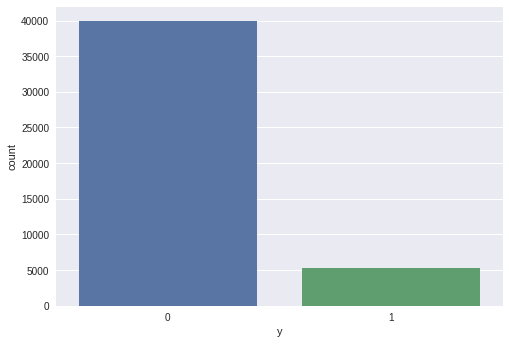

In [ ]:
df_majority=df2[df2['y']==0]
df_minority=df2[df2['y']==1]

print('Before Resampling')
print(df2['y'].value_counts())
df_minority_smaple=resample(df_minority,replace=True,n_samples=39538,random_state=42)
sns.countplot(df2['y'])
plt.show()

After Resampling
0    39922
1    39538
Name: y, dtype: int64


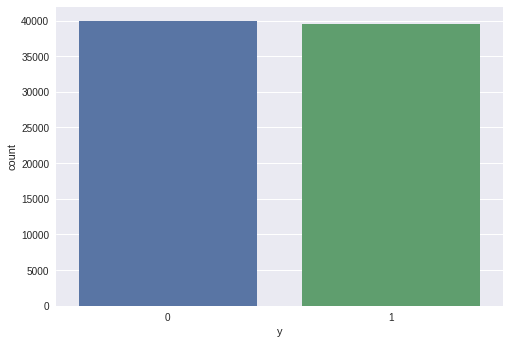

In [ ]:
df_unsampled=pd.concat([df_minority_smaple,df_majority])
print('After Resampling')
print(df_unsampled['y'].value_counts())
sns.countplot(df_unsampled['y'])
plt.show()

In [ ]:
df3=df_unsampled

**4.Outliers Detection and Removal**

In [ ]:
for elem in ['age','day','dur','num_calls']:
  print(elem)
  print(np.sort(df3[elem].unique()))

age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]
day
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
dur
[   0    1    2 ... 3785 3881 4918]
num_calls
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 43 44 46 50 51 55 58 63]


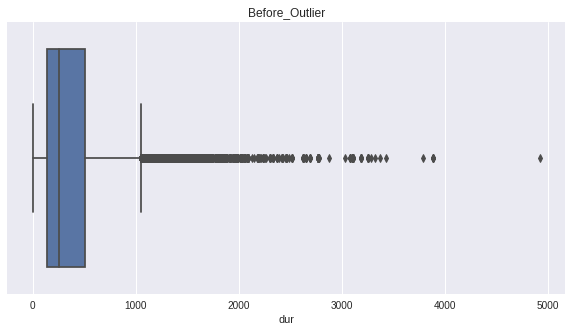

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Before_Outlier')
sns.boxplot(df3['dur'])
plt.show()

In [ ]:
df3.values

array([[59,  0,  0, ...,  3,  1,  1],
       [25,  0,  1, ...,  3,  1,  1],
       [26,  0,  0, ...,  1,  4,  1],
       ...,
       [34,  0,  0, ...,  3,  3,  0],
       [57,  0,  0, ...,  4,  1,  0],
       [37,  0,  0, ...,  2,  3,  0]])

In [ ]:
z=np.abs(stats.zscore(df3.dur))
print('\tz_values\n',z)
print('\nBefore Outliers',df3.shape)
del_rows=np.where(z>3.0)
rows=list(del_rows[0])

df3.drop(df3.index[(rows)],inplace=True)
print('\nAfter Outliers',df3.shape)

	z_values
 19066    0.393934
45085    0.970753
45005    0.527255
42254    0.532994
40506    0.022179
           ...   
45194    0.619087
45198    0.128360
45199    2.262139
45209    0.373846
45210    0.048007
Name: dur, Length: 79460, dtype: float64

Before Outliers (79460, 37)

After Outliers (78052, 37)


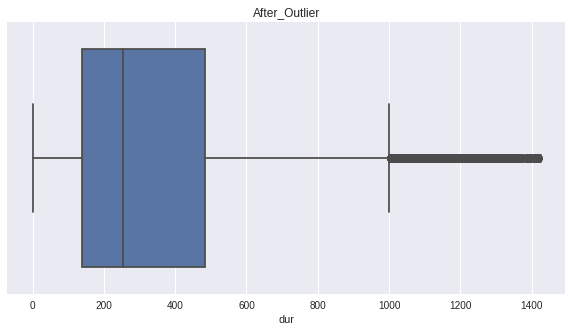

In [ ]:
plt.figure(figsize=(10,5))
plt.title('After_Outlier')
sns.boxplot(df3['dur'])
plt.show()

**5.Train and test data split**

In [ ]:
x=df3.drop(['y'],axis=1) #Without Traget
y=df3['y'] #Target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**6.Implement Classifier Models**

1.   **Random Forest Classifier**




In [ ]:
#Model Creation
model=RandomForestClassifier(n_estimators=10,criterion="gini",random_state=0,n_jobs=-1,oob_score=True)
#Fit the model
model.fit(x_train,y_train)
#Prediction
y_pred=model.predict(x_test)

2. **Accuracy Score**

In [ ]:
print('Accuracy Score :','{:.3f}'.format(accuracy_score(y_test,y_pred)))

Accuracy Score : 0.965




*   n_estimator=10 and criterion='gini' we have 0.965
*   (n_estimator=10 or n_estimators=100) and criterion='entrpoy' we have 0.963

3. **Out of bag error**

In [ ]:
#oob score
print('Random Forest : Out of Bag Error : ','{:.3f}'.format(model.oob_score_))

Random Forest : Out of Bag Error :  0.956


4. **Confusion Matrix**

In [ ]:
print('Random Forest : Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))

Random Forest : Confusion Matrix

[[11209   771]
 [   46 11390]]


5. **Classification Report**

In [ ]:
print('Random Forest : Classification Report\n')
print(classification_report(y_test,y_pred))

Random Forest : Classification Report

              precision    recall  f1-score   support

           0       1.00      0.94      0.96     11980
           1       0.94      1.00      0.97     11436

    accuracy                           0.97     23416
   macro avg       0.97      0.97      0.97     23416
weighted avg       0.97      0.97      0.97     23416



6. **Feature Importance**

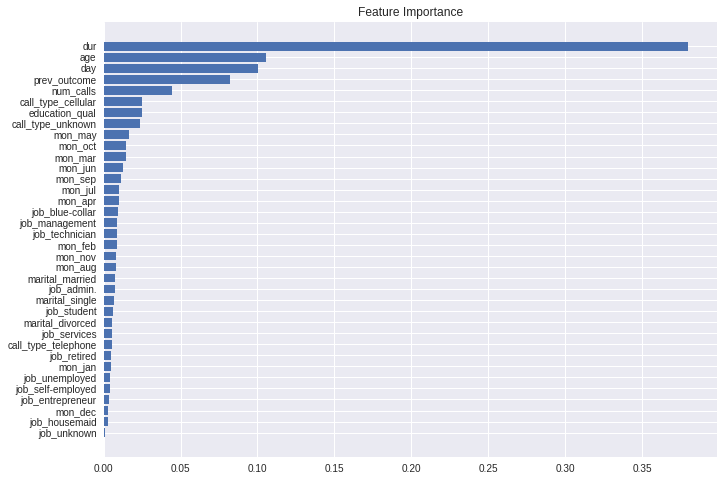

In [ ]:
feature_imp=model.feature_importances_
feature_important=pd.Series(feature_imp,index=x_train.columns)
feature_important=feature_important.sort_values(ascending=True)


plt.figure(figsize=(11,8))
plt.title('Feature Importance')
plt.barh(feature_important.index,feature_important.values)
plt.show()

job_unknown feature is the least important feature so im going to drop it and 

---

again build the model.

7. **Random Forest Classifier & Logistics Regression**
   
   **Implement the models with selected features only**

In [ ]:
#Without Traget
x1=df3.drop(['y','job_unknown'],axis=1) 

#Target
y1=df3['y'] 

8.  **Train & Test split data**

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [ ]:
#Implement the model
model1=RandomForestClassifier(n_estimators=10,criterion="gini",random_state=0,n_jobs=-1,oob_score=True)
model2=LogisticRegression()

#Fit the data
model1.fit(x_train1,y_train1)
model2.fit(x_train1,y_train1)

#Predict the test data
y_pred=model1.predict(x_test1)
y_pred1=model2.predict(x_test1)

9. **Accuracy Score**

In [ ]:
print('Random Forest Classifier : accuracy_score :','{:.3f}'.format(accuracy_score(y_test1,y_pred)))
print('Logistics Regression : accuracy_score     :','{:.3f}'.format(accuracy_score(y_test1,y_pred1)))

Random Forest Classifier : accuracy_score : 0.967
Logistics Regression : accuracy_score     : 0.803


10. **Out of bag error**

In [ ]:
print('Random Forest Classifier : oob score :','{:.3f}'.format(model1.oob_score_))

Random Forest Classifier : oob score : 0.954


11. **Confusion Matrix**

In [ ]:
print('Random Forest Classifier : confusion_matrix : \n',confusion_matrix(y_test1,y_pred))
print('\n')
print('Logistics Regression     : confusion_matrix : \n',confusion_matrix(y_test1,y_pred1))

Random Forest Classifier : confusion_matrix : 
 [[11261   719]
 [   47 11389]]


Logistics Regression     : confusion_matrix : 
 [[9773 2207]
 [2402 9034]]


12. **Classification Report**

In [ ]:
print('Random Forest Classifier : classification_report \n\n',classification_report(y_test1,y_pred))
print('\n')
print('Logistics Regression  : classification_report \n\n',classification_report(y_test1,y_pred1))

Random Forest Classifier : classification_report 

               precision    recall  f1-score   support

           0       1.00      0.94      0.97     11980
           1       0.94      1.00      0.97     11436

    accuracy                           0.97     23416
   macro avg       0.97      0.97      0.97     23416
weighted avg       0.97      0.97      0.97     23416



Logistics Regression  : classification_report 

               precision    recall  f1-score   support

           0       0.80      0.82      0.81     11980
           1       0.80      0.79      0.80     11436

    accuracy                           0.80     23416
   macro avg       0.80      0.80      0.80     23416
weighted avg       0.80      0.80      0.80     23416



13. **AUCROC Curve**

In [ ]:
predict_prob1=model1.predict_proba(x_test1)
predict_prob1=model2.predict_proba(x_test1)

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test1, y_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test1, y_pred1, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test1))]
p_fpr, p_tpr, _ = roc_curve(y_test1, random_probs, pos_label=1)

14. **ROC Score**

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test1, y_pred)
auc_score2 = roc_auc_score(y_test1, y_pred1)

print('Random Forest Classifier : roc_auc_score :','{:.3f}'.format(auc_score1))
print('Logistics Regression     : roc_auc_score :','{:.3f}'.format(auc_score2))

Random Forest Classifier : roc_auc_score : 0.968
Logistics Regression     : roc_auc_score : 0.803


15. **Graph the ROC Curve**

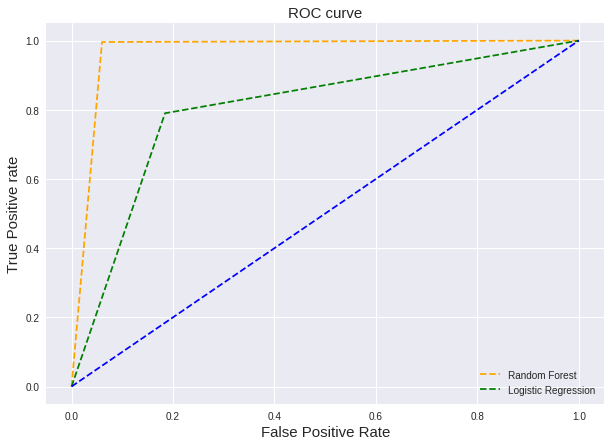

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve',fontsize=15)
# x label
plt.xlabel('False Positive Rate',fontsize=15)
# y label
plt.ylabel('True Positive rate',fontsize=15)

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

It is evident from the plot that the AUC for the Random Forest ROC curve is higher than that for the Logistic Regression ROC curve. Therefore, we can say that Random Forest did a better job of classifying the positive class in the dataset.

16. **Gradient Boosting Algorithm**

In [ ]:
# Define Gradient Boosting Classifier 
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC
gbc.fit(x_train1,y_train1)

# Confusion matrix will give number of correct and incorrect classifications
print('Confusion Matrix :\n\n',confusion_matrix(y_test, gbc.predict(x_test1)))

# Accuracy of model
print("\nGBC accuracy is %2.2f\n" % accuracy_score( y_test1, gbc.predict(x_test1)))
pred=gbc.predict(x_test1)
print('classification_report\n\n',classification_report(y_test1, pred))

Confusion Matrix :

 [[10160  1820]
 [ 1419 10017]]

GBC accuracy is 0.86

classification_report

               precision    recall  f1-score   support

           0       0.88      0.85      0.86     11980
           1       0.85      0.88      0.86     11436

    accuracy                           0.86     23416
   macro avg       0.86      0.86      0.86     23416
weighted avg       0.86      0.86      0.86     23416



The accuracy is 86%, which is pretty good but this can be improved by tuning the hyperparameters.

17. **Parameter Tuning in Gradient Boosting**

   **Tuning n_estimators and Learning rate**

n_estimators is the number of trees that we want to add in the model. there are no optimum values for learning rate as low values always work better, given that we train on sufficient number of trees. a high number of trees can be computationally expensive that’s why i have taken few number of trees here.

In [ ]:
grid = {'learning_rate':[0.01,0.05,0.1],'n_estimators':np.arange(100,500,100),}
gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(x_train1,y_train1)

print("Best Parameters:",gb_cv.best_params_)
print("\nTrain Score:",'{:.2f}'.format(gb_cv.best_score_))
print("Test Score:",'{:.2f}'.format(gb_cv.score(x_test1,y_test1)))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}

Train Score: 0.88
Test Score: 0.87


We see the accuracy increased from 86 to 88 after tuning n_estimators and learning rate. Also the “true positive” and the “true negative” rate improved.

We can also tune max_depth parameter which you must have heard in decision trees and random forests.



In [ ]:
grid = {'max_depth':[2,3,4,5,6,7] }
gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=400)
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(x_train1,y_train1)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(n_estimators=400),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7]})

In [ ]:
print("Best Parameters:",gb_cv.best_params_)
print("\nTrain Score:",'{:.2f}'.format(gb_cv.best_score_))
print("Test Score:",'{:.2f}'.format(gb_cv.score(x_test1,y_test1)))

Best Parameters: {'max_depth': 7}

Train Score: 0.94
Test Score: 0.94


The accuracy has increased even more when we tuned the parameter “max_depth”.

#**Conclusion**
**The most contributing and important feature is "dur". roc curve, accuracy score, confusion_matrix, classification report said that random forest is better than Gradient Boosting and logistic regression .**

**Accuracy score of Random Forest Classifier : 97%**

**Accuracy score of Logistics Regression     : 80%** 

**Accuracy score of Gradient Boosting        : 94%**



**Random Forest model is fitted to this dataset.**